In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

### Preliminary data analysis

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Age,Gender,A,B,C,D,E,F,G,H,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.describe()

,Age,A,B,C,D,E,F,G,H,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
# Grouping the content w.r.t. the target
for person in df.groupby("Target"):
    print(person[1].describe())

              Age           A           B            C            D  \
count  416.000000  416.000000  416.000000   416.000000   416.000000   
mean    46.153846    4.164423    1.923558   319.007212    99.605769   
std     15.654412    7.144831    3.206901   268.307911   212.768472   
min      7.000000    0.400000    0.100000    63.000000    12.000000   
25%     34.000000    0.800000    0.200000   186.000000    25.000000   
50%     46.000000    1.400000    0.500000   229.000000    41.000000   
75%     58.000000    3.625000    1.800000   315.250000    76.500000   
max     90.000000   75.000000   19.700000  2110.000000  2000.000000   

                 E           F           G           H  Target  
count   416.000000  416.000000  416.000000  414.000000   416.0  
mean    137.699519    6.459135    3.060577    0.914179     1.0  
std     337.389980    1.094659    0.786595    0.326153     0.0  
min      11.000000    2.700000    0.900000    0.300000     1.0  
25%      29.750000    5.700000    2

Insights:

    1) Data has varying scales so normalization might be needed when using algorithms like KNN or Neural Netowrks.
    2) Some values in H are missing.
    3) At the first look, I can  say that feature A, D, E are the most interesting features as their variance in person 1 is much higher than person 2

### Data Preprocessing


In [6]:
# Change value 2 to 0, just for the sake of simplicity.
df["Target"] = df["Target"].replace(2,0)

### Data visualization

In [7]:
# Add a color column to analyze person 1 and 2 in pairplot below
colors = np.where(df["Target"]==0, "r", "g")
df["colors"] =  pd.Series(colors) 

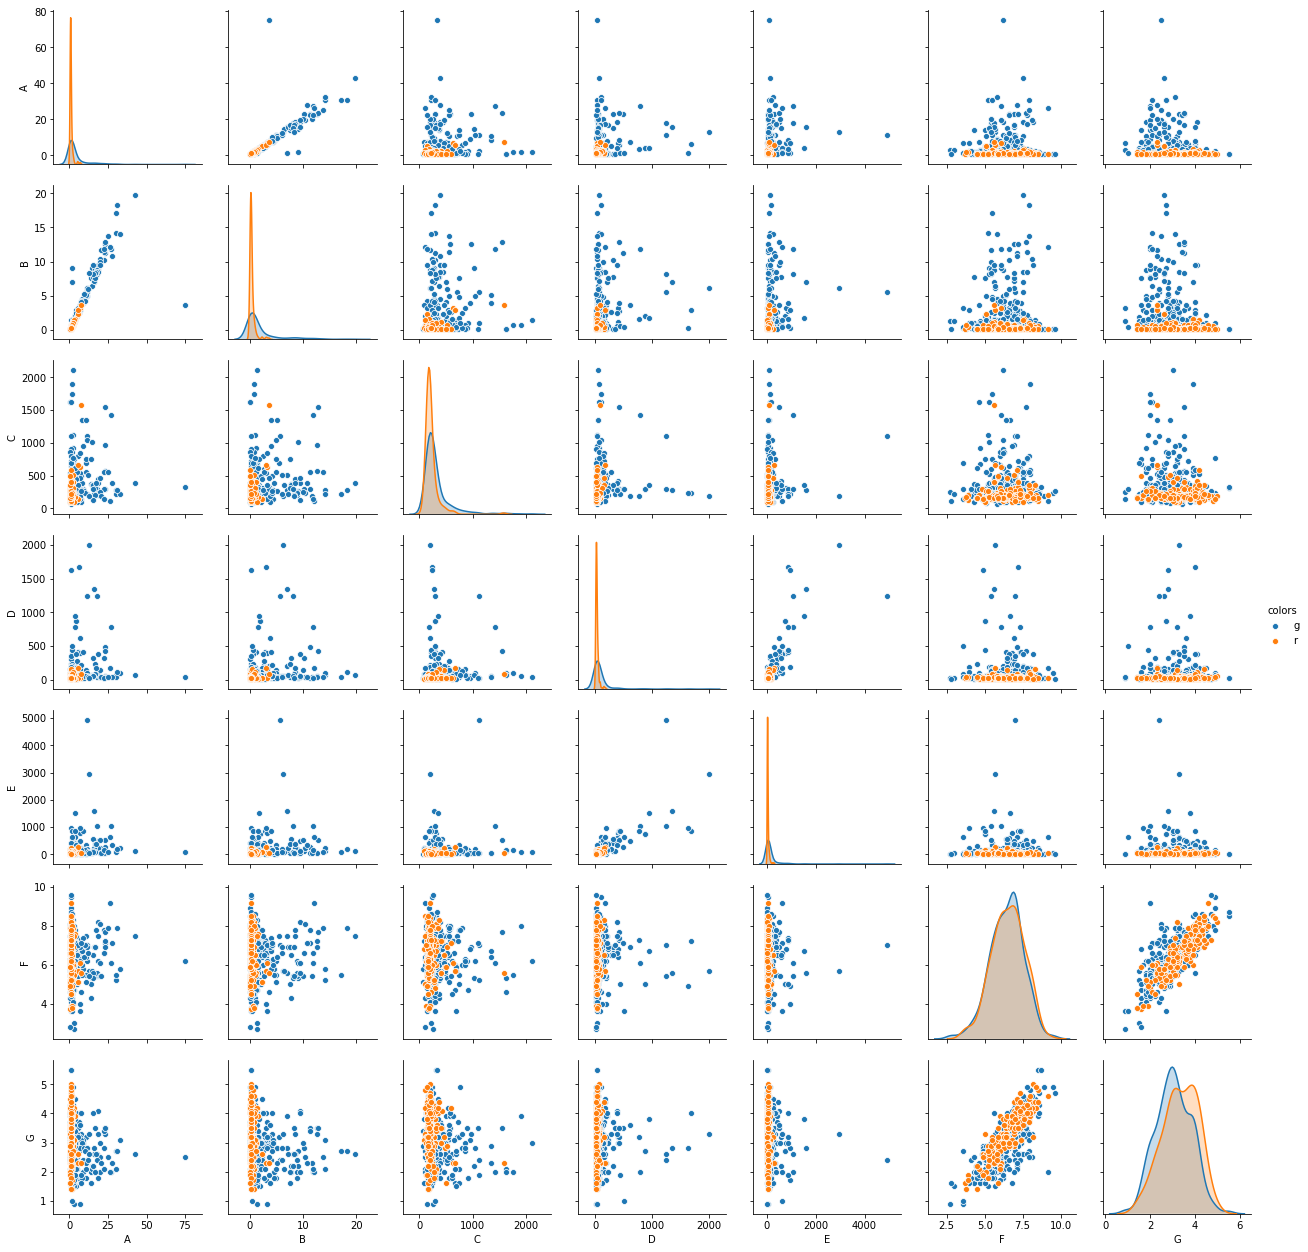

In [8]:
# plotting each column against every other column
sns.pairplot(df[["A","B","C","D","E", "F","G","colors"]],hue="colors", kind="scatter")

Insights:

    1) It looks like that person 2 has a lot less variance than person 1. In most of the cases the graph for person 2 is just one dimension.
    2) Combining features might make this problem simpler, for instance in (A,B) scatter plot data is almost linearly separable. 
    3) On the other hand, we can remove feature F, H and G as the don't as they don't have that much information.

### Feature selection

Based on the above insights, features (A,B,C,D,E) might help us in solving this problem.

Let's first apply PCA on A,B,C,D,E and try to make this problem three dimensional for visualization

In [9]:
# Select the important features
df_first_selected = df[["A","B","C","D","E"]]
features = df_first_selected

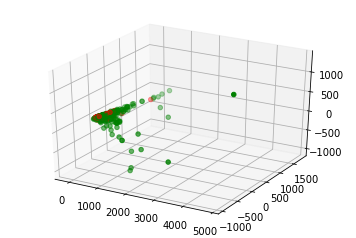

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Apply PCA
pca = PCA(n_components=3)
outputs = pca.fit_transform(df_first_selected)

# visualizing outputs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outputs[:,0],outputs[:,1],outputs[:,2], c= colors)
plt.show()

Seems nice! Let is make it to one dimensional and add it to out features list.

In [11]:
# Apply PCA and take the most important component
pca = PCA(n_components=1)
outputs = pca.fit_transform(df_first_selected)
features["PCA_outputs"] = outputs

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Also, looking at the A and B graph above I can say that multiplying them will increase the value of person one and will not make much effect person two's values 

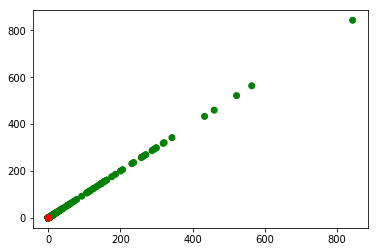

In [12]:
plt.scatter(df["A"]*df["B"], df["A"]*df["B"], c= colors)

Person 2 points are clustered around origin. To get an idea of distribution lets draw a distribution plot

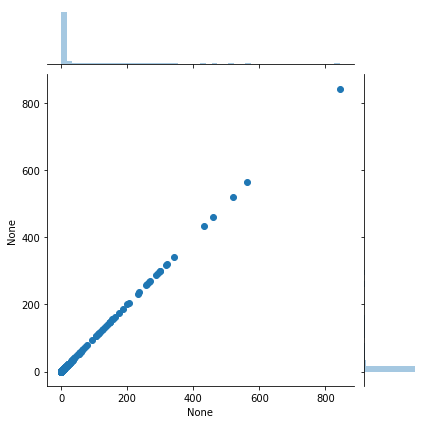

In [13]:
sns.jointplot(df["A"]*df["B"], df["A"]*df["B"])

Still data at origin is not clearly visible so let's take a closer look to it

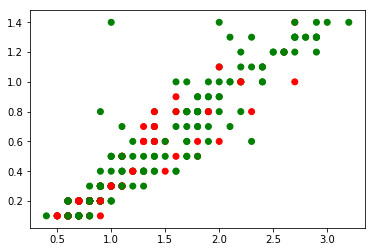

In [14]:
df_test = df.where(df["B"]<1.5)
plt.scatter(df_test["A"], df_test["B"], c= colors)
plt.show()

Data is not linearly separable at origin but we can try adding new non-linear features which gives linear algorithms more flexibility. 

In [15]:
# Adding similar features to our feature list
features["AB"] = df["A"]*df["B"]
features["DE"] = df["D"]*df["E"]
features["BC"] = df["B"]*df["C"]
features["EA"] = df["E"]*df["A"]
features["CD"] = df["C"]*df["D"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

### Calculating predictions from different models

In [16]:
#  split data into train and test
x_train, x_test, y_train, y_test = train_test_split(np.array(features), df["Target"], train_size = .7)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Starting with simple but effective logistic regression

In [37]:

from sklearn.linear_model.logistic import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
f1_score(lr.predict(x_test), y_test)

0.8135593220338982

The output of the logistic regression is good but we can also try SGD as it implements a hinge loss with penalty.

In [50]:
from sklearn.linear_model import SGDClassifier
rfc = SGDClassifier(loss = "modified_huber")
rfc.fit(x_train, y_train)
f1_score(rfc.predict(x_test), y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8333333333333333

The f1 score increases so we can also try svm with hinge loss.

In [39]:
from sklearn.svm import SVC
rfc = SVC()
rfc.fit(x_train, y_train)
f1_score(rfc.predict(x_test), y_test)

0.8333333333333333

### Neural networks

In [40]:
#  Import necessary libraries
from keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout, PReLU, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical

In [21]:
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = .9)

In [22]:
# Convert labels into onehot encoding
onehot_ytrain = to_categorical(y_train)
# onehot_yval = to_categorical(y_val)
onehot_ytest = to_categorical(y_test)

Developed a model using Keras using 3 dense layers

In [45]:
model = Sequential()
model.add(Conv1D(32,kernel_size=3, input_shape = [11,1],  kernel_initializer='normal', padding = "same", activation=PReLU()))
model.add(Conv1D(64,kernel_size=3,   kernel_initializer='normal', padding = "same", activation=PReLU()))
model.add(Conv1D(128,kernel_size=3,   kernel_initializer='normal', padding = "same", activation=PReLU()))
model.add(Conv1D(64,kernel_size=3,   kernel_initializer='normal', padding = "same", activation=PReLU()))
model.add(Conv1D(2,kernel_size=3,   kernel_initializer='normal', padding = "same", activation=PReLU()))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation='softmax'))

# Print the model
model.summary()
adam = Adam(lr=.0005)
ModelCheckpoint("./", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min', period=1)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["acc"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 11, 32)            128       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 11, 64)            6208      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 11, 128)           24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 11, 64)            24640     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 11, 2)             386       
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 2)             8         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 2)             0         
__________

/usr/local/lib/python3.5/dist-packages/keras/activations.py:89: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [46]:
# Train the model
hist = model.fit(np.reshape(x_train,(list(x_train.shape) + [1])), np.array(onehot_ytrain), 
                 batch_size=32, epochs=100, validation_data=[np.reshape(x_test,(list(x_test.shape) + [1])), np.array(onehot_ytest)])

Train on 408 samples, validate on 175 samples
Epoch 1/1000
408/408 [==============================] - 0s - loss: 0.6318 - acc: 0.7034 - val_loss: 4.4689 - val_acc: 0.7143
Epoch 2/1000
408/408 [==============================] - 0s - loss: 0.5808 - acc: 0.7132 - val_loss: 4.4377 - val_acc: 0.7143
Epoch 3/1000
408/408 [==============================] - 0s - loss: 0.5530 - acc: 0.7132 - val_loss: 3.7301 - val_acc: 0.7143
Epoch 4/1000
408/408 [==============================] - 0s - loss: 0.5349 - acc: 0.7132 - val_loss: 1.7915 - val_acc: 0.7143
Epoch 5/1000
408/408 [==============================] - 0s - loss: 0.5487 - acc: 0.7132 - val_loss: 3.2492 - val_acc: 0.7143
Epoch 6/1000
408/408 [==============================] - 0s - loss: 0.5297 - acc: 0.7132 - val_loss: 2.4036 - val_acc: 0.7143
Epoch 7/1000
408/408 [==============================] - 0s - loss: 0.5251 - acc: 0.7132 - val_loss: 1.5118 - val_acc: 0.7143
Epoch 8/1000
408/408 [==============================] - 0s - loss: 0.5286 - acc

IndexError: list index out of range

In [48]:
#  Accuracy on test set
loss, acc = model.evaluate(np.reshape(x_test,(list(x_test.shape) + [1])),onehot_ytest)
print("Loss: ", loss)
print("Accuracy: ", acc)

 32/175 [====>.........................] - ETA: 0sLoss:  4.60517015184675
Accuracy:  0.7142857149669102


In [49]:
f1_score(model.predict_classes(np.reshape(x_test,(list(x_test.shape) + [1]))), y_test)

 32/175 [====>.........................] - ETA: 0s

0.8333333333333333

### Conclusions

1) Most of the data points are clustered around the origin which makes it difficult to increase accuracy any further.

2) Adding non-linear features provides better output.

3) I used F1 score because classes are imbalanced and no weightage for false positives or false negatives is required.

4) SVM with rbf performs equally good as Neural Networks because data quantity is less.

